In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

#### Step 1: Image Preprocessing

In [3]:
img_path = 'Data'
images = []
for filename in os.listdir(img_path):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(img_path, filename))
        img = cv2.resize(img, (128, 128)) # Resize the images to make them all the same size
        images.append(img)

#### Step 2: Feature Extraction

In [4]:
filtered_images = []
for img in images:
    # Apply Gaussian filter to blur the image
    img_gaussian = cv2.GaussianBlur(img, (5, 5), 0)

    ''' TURN OF ENTROPY FILTER
    # Apply Entropy filter to extract the disorder/roughness of an image
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    entropy_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    img_entropy = cv2.filter2D(img_gray, -1, entropy_kernel)
    '''
    # Apply Sobel filter to extract hard edges
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_sobel = cv2.Sobel(img_gray, cv2.CV_8U, 1, 1, ksize=3)
    # filtered_images.append((img, img_gaussian, img_entropy, img_sobel))
    filtered_images.append((img, img_gaussian, img_sobel))

In [5]:
''' TURN OF ENTROPY FILTER
# Show the original and filtered images using subplots in Matplotlib
fig, axs = plt.subplots(nrows=len(filtered_images), ncols=4, figsize=(10, 30))
for i, filtered_img in enumerate(filtered_images):
    axs[i][0].imshow(cv2.cvtColor(filtered_img[0], cv2.COLOR_BGR2RGB))
    axs[i][0].set_title('Original')
    axs[i][1].imshow(cv2.cvtColor(filtered_img[1], cv2.COLOR_BGR2RGB))
    axs[i][1].set_title('Gaussian')
    axs[i][2].imshow(filtered_img[2], cmap='gray')
    axs[i][2].set_title('Entropy')
    axs[i][3].imshow(filtered_img[3], cmap='gray')
    axs[i][3].set_title('Sobel')
plt.tight_layout()
plt.show()
'''

" TURN OF ENTROPY FILTER\n# Show the original and filtered images using subplots in Matplotlib\nfig, axs = plt.subplots(nrows=len(filtered_images), ncols=4, figsize=(10, 30))\nfor i, filtered_img in enumerate(filtered_images):\n    axs[i][0].imshow(cv2.cvtColor(filtered_img[0], cv2.COLOR_BGR2RGB))\n    axs[i][0].set_title('Original')\n    axs[i][1].imshow(cv2.cvtColor(filtered_img[1], cv2.COLOR_BGR2RGB))\n    axs[i][1].set_title('Gaussian')\n    axs[i][2].imshow(filtered_img[2], cmap='gray')\n    axs[i][2].set_title('Entropy')\n    axs[i][3].imshow(filtered_img[3], cmap='gray')\n    axs[i][3].set_title('Sobel')\nplt.tight_layout()\nplt.show()\n"

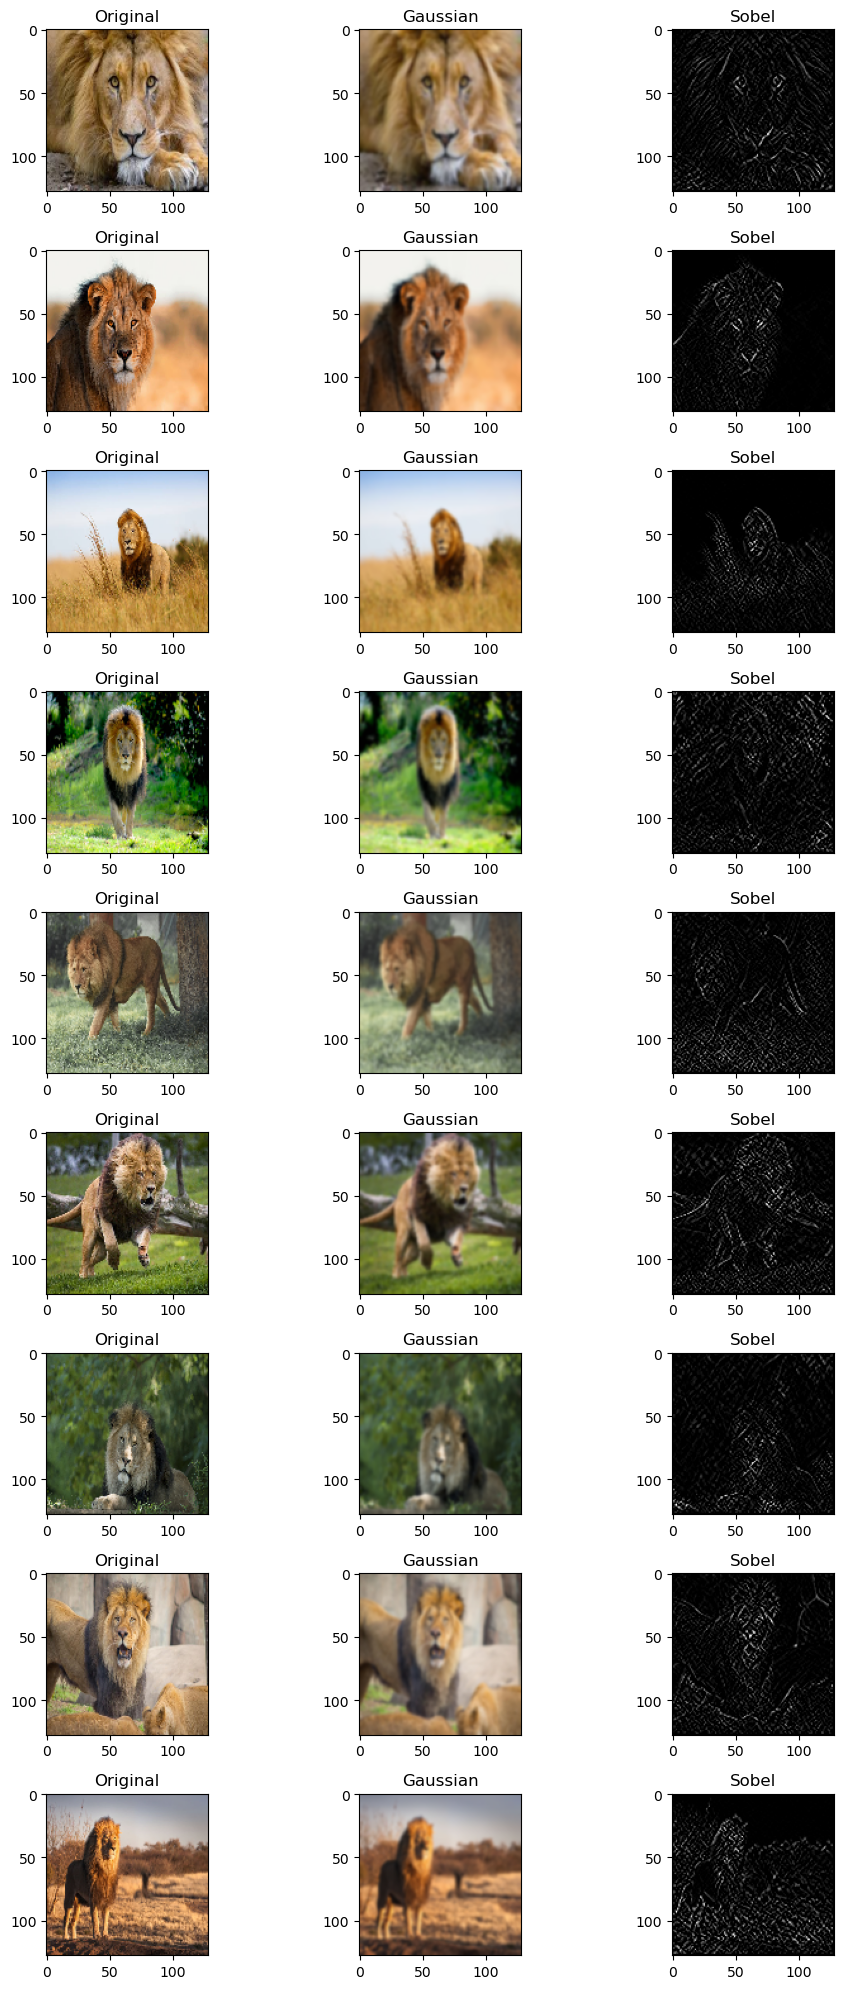

In [7]:
# Show the original and filtered images using subplots in Matplotlib
fig, axs = plt.subplots(nrows=len(filtered_images), ncols=3, figsize=(10, 20))
for i, filtered_img in enumerate(filtered_images):
    axs[i][0].imshow(cv2.cvtColor(filtered_img[0], cv2.COLOR_BGR2RGB))
    axs[i][0].set_title('Original')
    axs[i][1].imshow(cv2.cvtColor(filtered_img[1], cv2.COLOR_BGR2RGB))
    axs[i][1].set_title('Gaussian')
    axs[i][2].imshow(filtered_img[2], cmap='gray')
    axs[i][2].set_title('Sobel')
plt.tight_layout()
plt.show()